Data Transformation (Sentiment Score Extraction)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00
Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content',
       'tconst'],
      dtype='object')
65806
                                      review_content  sentiment_score
0  A fantasy adventure that fuses Greek mythology...           0.7579
1  Uma Thurman as Medusa, the gorgon with a coiff...           0.0000
2  With a top-notch cast and dazzling special eff...           0.4019
3  Whether audiences will get behind The Lightnin...           0.7050
4  What's really lacking in The Lightning Thief i...          -0.5267


<ipython-input-5-911bcf4cde6a>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')


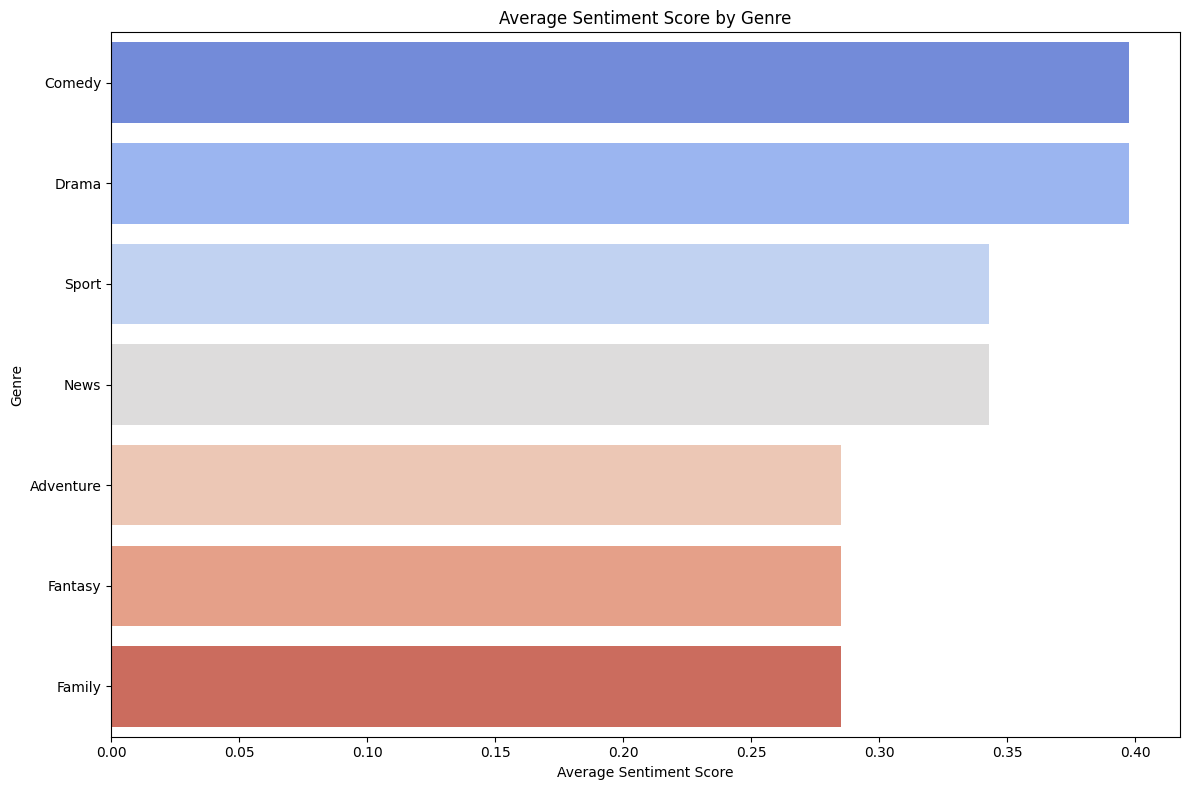

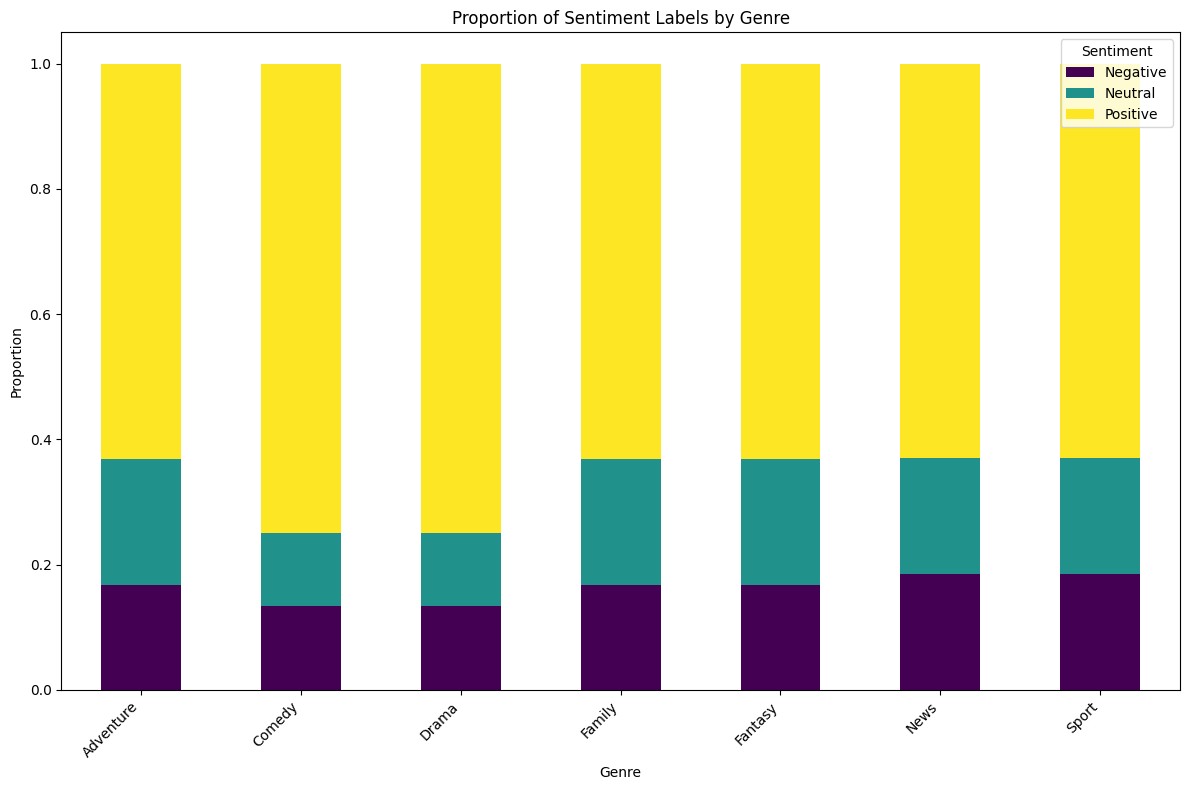

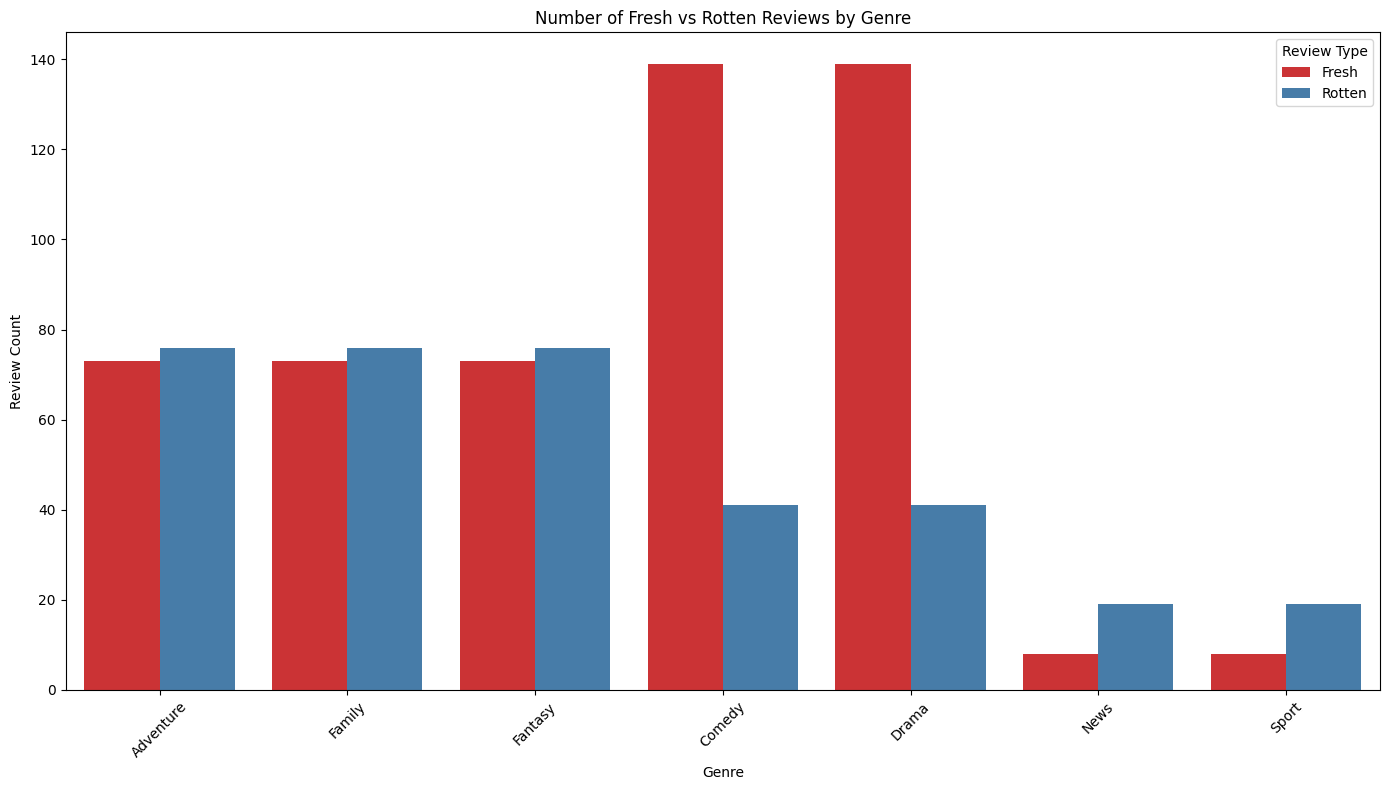

In [5]:
# Install the necessary package for sentiment analysis
!pip install vaderSentiment

# Import required libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Check the columns of rotten_reviews_df to identify the correct column name for the review text
print(rotten_reviews_df.columns)

# Check for missing values in 'review_content'
print(rotten_reviews_df['review_content'].isnull().sum())

# Option 1: Fill missing review content with an empty string
rotten_reviews_df['review_content'] = rotten_reviews_df['review_content'].fillna('')

# Option 2: Drop rows with missing review content
# rotten_reviews_df = rotten_reviews_df.dropna(subset=['review_content'])

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply VADER sentiment analysis to the 'review_content' column
rotten_reviews_df['sentiment_score'] = rotten_reviews_df['review_content'].apply(get_sentiment)

# Inspect the first few rows of 'review_content' and sentiment scores to check for any issues
print(rotten_reviews_df[['review_content', 'sentiment_score']].head())

# Function to label sentiment based on sentiment score
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
rotten_reviews_df['sentiment_label'] = rotten_reviews_df['sentiment_score'].apply(label_sentiment)

# Merge genres into Rotten Tomatoes reviews DataFrame
rotten_reviews_df = rotten_reviews_df.merge(merged_df[['tconst', 'genres']], on='tconst', how='left')

# Group by genre and calculate the mean sentiment score for each genre
genre_sentiment = rotten_reviews_df.groupby('genres')['sentiment_score'].mean().reset_index()

# Sort genres by mean sentiment score
genre_sentiment = genre_sentiment.sort_values(by='sentiment_score', ascending=False)

# Plot the average sentiment score by genre
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')
plt.title('Average Sentiment Score by Genre')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Group by genre and sentiment label, then count the occurrences
genre_label_counts = rotten_reviews_df.groupby(['genres', 'sentiment_label']).size().unstack().fillna(0)

# Normalize for proportions
genre_label_props = genre_label_counts.div(genre_label_counts.sum(axis=1), axis=0)

# Plot the proportion of sentiment labels by genre
genre_label_props.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Sentiment Labels by Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Plot the count of Fresh vs Rotten reviews by genre
plt.figure(figsize=(14, 8))
sns.countplot(data=rotten_reviews_merged, x='genres', hue='review_type', palette='Set1')
plt.title('Number of Fresh vs Rotten Reviews by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Review Count')
plt.legend(title='Review Type')
plt.tight_layout()
plt.show()
